### Import Modules

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

### UN SDG Colour Codes

In [86]:
SDG_colour_list = ['#E5243B','#DDA63A','#4C9F38','#C5192D','#FF3A21',
                   '#26BDE2','#FCC30B','#A21942','#FD6925','#DD1367',
                   '#FD9D24','#BF8B2E','#3F7E44','#0A97D9','#56C02B',
                   '#00689D','#19486A']
goal_to_colour_dict = dict(zip(range(1,18),SDG_colour_list))

## Import new UN SDG data: 1990 - 2019
Downloaded from https://unstats.un.org/sdgs/indicators/database/

In [87]:
df_un = pd.read_csv('data/new/SDG_all_countries_90_19.csv', low_memory=False)

In [88]:
df_un.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,[Policy Domains],[Quantile],[Reporting Type],[Sex],[Tariff regime (status)],[Type of mobile technology],[Type of occupation],[Type of product],[Type of skill],[Type of speed]
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,1996,1.1,1996,...,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,2002,2,2002,...,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,2005,1.1,2005,...,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,2008,0.4,2008,...,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,2012,1.1,2012,...,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_un.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       ' UpperBound', ' LowerBound', ' BasePeriod', ' Source', 'FootNote',
       'Nature', 'Units', '[Age]', '[Cities]', '[Disability status]',
       '[Education level]', '[IHR Capacity]', '[Level/Status]', '[Location]',
       '[Migratory status]', '[Mode of transportation]',
       '[Name of international institution]',
       '[Name of non-communicable disease]', '[Policy Domains]', '[Quantile]',
       '[Reporting Type]', '[Sex]', '[Tariff regime (status)]',
       '[Type of mobile technology]', '[Type of occupation]',
       '[Type of product]', '[Type of skill]', '[Type of speed]'],
      dtype='object')

In [90]:
# fix trailing spaces in column names
df_un.columns = ['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail', 'UpperBound', 'LowerBound',
       'BasePeriod', 'Source', 'FootNote', 'Nature', 'Units', '[Age]',
       '[Cities]', '[Disability status]', '[Education level]',
       '[IHR Capacity]', '[Level/Status]', '[Location]', '[Migratory status]',
       '[Mode of transportation]', '[Name of international institution]',
       '[Name of non-communicable disease]', '[Policy Domains]', '[Quantile]',
       '[Reporting Type]', '[Sex]', '[Tariff regime (status)]',
       '[Type of mobile technology]', '[Type of occupation]',
       '[Type of product]', '[Type of skill]', '[Type of speed]']

### Create dataframe which holds the targets and information about them

In [91]:
df_info = df_un.drop_duplicates(['SeriesCode']).reset_index()
df_info = df_info[['Goal', 'Target', 'Indicator', 'SeriesCode', 'Units', 'Nature', 'UpperBound', 'LowerBound',
                   'SeriesDescription','Source', 'FootNote']]

In [92]:
df_info.columns = ['Goal', 'Target', 'Indicator', 'SeriesCode', 'Units', 'Nature', 'UpperBound', 'LowerBound',
                   'SeriesDescription', 'Source (can differ)', 'FootNote (can differ)']

In [93]:
df_info.head()

,Goal,Target,Indicator,SeriesCode,Units,Nature,UpperBound,LowerBound,SeriesDescription,Source (can differ),FootNote (can differ)
0,1,1.1,1.1.1,SI_POV_DAY1,PERCENT,G,NaN,NaN,Proportion of population below international p...,"World Development Indicators database, World Bank",Estimated from unit-record consumption data.
1,1,1.1,1.1.1,SI_POV_EMP1,PERCENT,M,NaN,NaN,Employed population below international povert...,"ILO estimates, November 2018, available in ILO...",NaN
2,1,1.2,1.2.1,SI_POV_NAHC,PERCENT,CA,NaN,NaN,Proportion of population living below the nati...,"World Development Indicators database, World Bank",Source: National Statictis and Information Aut...
3,1,1.3,1.3.1,SI_COV_MATNL,PERCENT,E,NaN,NaN,[ILO] Proportion of mothers with newborns rece...,ILO Social Security Inquiry (SSI). Available a...,ILO estimates based on country data
4,1,1.3,1.3.1,SI_COV_POOR,PERCENT,E,NaN,NaN,[ILO] Proportion of poor population receiving ...,ILO Social Security Inquiry (SSI). Available a...,ILO estimates based on country data


In [94]:
df_info.to_csv('outputs/data/SDG_targets_info.csv')
#df_info = pd.read_csv('data/new/SDG_targets_info.csv')

### Add in *World Bank Income Classifications* for the countries

Import data from the World Bank that matches each country to its classification:

In [95]:
df_wb_groups = pd.read_csv('data/new/wb_income_groups.csv', encoding="ISO-8859-1")
df_wb_groups.columns = ['WB_Country','WB_ISOa3','WB_Region','WB_Income_group']
df_wb_groups.head()

,WB_Country,WB_ISOa3,WB_Region,WB_Income_group
0,Afghanistan,AFG,South Asia,Low income
1,Albania,ALB,Europe & Central Asia,Upper middle income
2,Algeria,DZA,Middle East & North Africa,Upper middle income
3,American Samoa,ASM,East Asia & Pacific,Upper middle income
4,Andorra,AND,Europe & Central Asia,High income


The UN SDF data (df_un) only has the M49 codes to identify the countries but the World Bank dataset uses ISOa3 codes. So in order to join them up, we must use a third dataset which includes countries' both types of code:

#### Country codes - ISOa3 and M49, from the UN

In [96]:
df_UN_country_codes_raw = pd.read_csv('data/new/UN_country_codes.csv')
df_codes = df_UN_country_codes_raw[['Country or Area', 'M49 Code', 'ISO-alpha3 Code',
                                    'Region Code', 'Region Name','Sub-region Code', 'Sub-region Name']]
# reset column names to match other dataset
df_codes.columns = ['Country','M49','ISOa3',
                    'Region M49', 'Region Name','Sub-region M49', 'Sub-region Name']
df_codes.head()

,Country,M49,ISOa3,Region M49,Region Name,Sub-region M49,Sub-region Name
0,Afghanistan,4,AFG,142.0,Asia,34.0,Southern Asia
1,Åland Islands,248,ALA,150.0,Europe,154.0,Northern Europe
2,Albania,8,ALB,150.0,Europe,39.0,Southern Europe
3,Algeria,12,DZA,2.0,Africa,15.0,Northern Africa
4,American Samoa,16,ASM,9.0,Oceania,61.0,Polynesia


#### Match together to get from ISO to M49 to match to SDG dataset...

In [97]:
df_countries = df_codes.join(df_wb_groups.set_index('WB_ISOa3'), on='ISOa3')\
.sort_values(by=['WB_Country'])\
.reset_index(drop=True)

df_countries.head()

,Country,M49,ISOa3,Region M49,Region Name,Sub-region M49,Sub-region Name,WB_Country,WB_Region,WB_Income_group
0,Afghanistan,4,AFG,142.0,Asia,34.0,Southern Asia,Afghanistan,South Asia,Low income
1,Albania,8,ALB,150.0,Europe,39.0,Southern Europe,Albania,Europe & Central Asia,Upper middle income
2,Algeria,12,DZA,2.0,Africa,15.0,Northern Africa,Algeria,Middle East & North Africa,Upper middle income
3,American Samoa,16,ASM,9.0,Oceania,61.0,Polynesia,American Samoa,East Asia & Pacific,Upper middle income
4,Andorra,20,AND,150.0,Europe,39.0,Southern Europe,Andorra,Europe & Central Asia,High income


In [98]:
# write output clean country information file
df_countries.to_csv('outputs/data/clean_country_info.csv')

## Explore targets and their disaggregation options (e.g. [Sex])

In [99]:
df_targets = df_un.drop_duplicates(['SeriesCode']).reset_index().drop(columns=['index','SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail', 'UpperBound', 'LowerBound',
       'BasePeriod', 'Source', 'FootNote', 'Nature', 'Units'])

In [100]:
df_targets.head()

,Goal,Target,Indicator,SeriesCode,[Age],[Cities],[Disability status],[Education level],[IHR Capacity],[Level/Status],...,[Policy Domains],[Quantile],[Reporting Type],[Sex],[Tariff regime (status)],[Type of mobile technology],[Type of occupation],[Type of product],[Type of skill],[Type of speed]
0,1,1.1,1.1.1,SI_POV_DAY1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.1,1.1.1,SI_POV_EMP1,25+,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,G,MALE,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.2,1.2.1,SI_POV_NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.3,1.3.1,SI_COV_MATNL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,G,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.3,1.3.1,SI_COV_POOR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,G,BOTHSEX,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
options_list = ['[Age]','[Cities]', '[Disability status]', '[Education level]',
       '[IHR Capacity]', '[Level/Status]', '[Location]', '[Migratory status]',
       '[Mode of transportation]', '[Name of international institution]',
       '[Name of non-communicable disease]', '[Policy Domains]', '[Quantile]',
       #'[Reporting Type]', 
       '[Sex]', '[Tariff regime (status)]',
       '[Type of mobile technology]', '[Type of occupation]',
       '[Type of product]', '[Type of skill]', '[Type of speed]']

### 1. How many targets have 1, 2, 3, ... disaggregation options?

In [102]:
target_options_dict = dict()

for i in range(len(df_targets['SeriesCode'])):
    row = df_targets.loc[i]
    target_options = []
    
    for option in options_list:
        if not pd.isnull(row[option]):
            target_options.append(option)
    target_options_dict[row['SeriesCode']] = target_options
    
target_options_dict_sizes = {key:len(value) for key,value in target_options_dict.items()}
df_target_options_sizes = pd.DataFrame([target_options_dict_sizes.keys(),target_options_dict_sizes.values()]).T

df_target_options_sizes.columns = ['Target','N_options']
df_target_options_sizes = df_target_options_sizes.set_index('Target').sort_values(by='N_options')

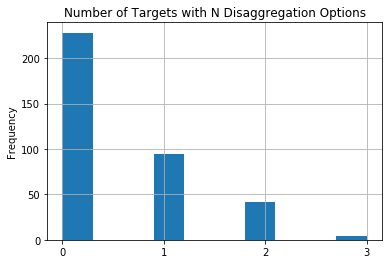

In [103]:
df_target_options_sizes.plot.hist(legend=False)
plt.grid(which='both')
plt.title('Number of Targets with N Disaggregation Options')
plt.xticks([0,1,2,3])
plt.show()

### 2. How many different values are there per disaggregation option?
e.g. [Sex] has MALE, FEMALE, BOTHSEX -> 3

In [104]:
n = 20
options_entries_dict = dict()
for option in options_list:
    options_entries_dict[option] = list(df_un[option].drop_duplicates())
                              
options_entries_dict_sizes = {key:len(value) for key,value in options_entries_dict.items()}
df_options_entries_sizes = pd.DataFrame([options_entries_dict_sizes.keys(),options_entries_dict_sizes.values()]).T

df_options_entries_sizes.columns = ['Option','N_values']
df_options_entries_sizes = df_options_entries_sizes.set_index('Option').sort_values(by='N_values')

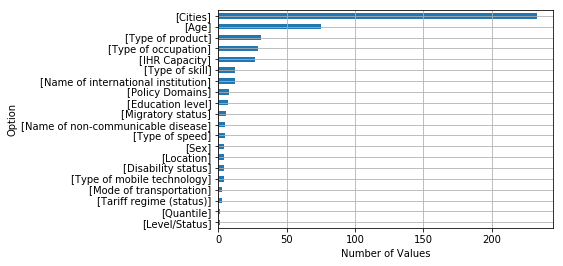

In [105]:
df_options_entries_sizes.plot.barh(legend=False)
plt.grid(which='both')
plt.xlabel('Number of Values')
plt.show()

### 3. How many targets does each option appear in?

In [106]:
options_targets_dict = dict()

for option in options_list:  
    options_targets_dict[option] = list(df_un[df_un[option].notnull()]['SeriesCode'].drop_duplicates())
    
options_targets_dict_sizes = {key:len(value) for key,value in  options_targets_dict.items()}
df_options_targets_sizes = pd.DataFrame([options_targets_dict_sizes.keys(),options_targets_dict_sizes.values()]).T

df_options_targets_sizes.columns = ['Option','N_targets']
df_options_targets_sizes = df_options_targets_sizes.set_index('Option').sort_values(by='N_targets')

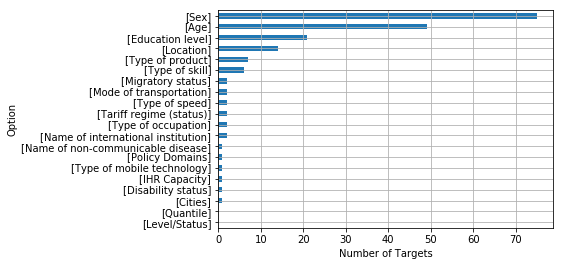

In [107]:
df_options_targets_sizes.plot.barh(legend=False)
plt.grid(which='both')
plt.xlabel('Number of Targets')
plt.show()

## Inspect data availability for the old targets from:
- new SDG data
- original WB data 
- new WB data (new API request)

In [108]:
oxymoron_targets = [
    'SI_POV_DDAY',
    'SN_ITK_DEFC_ZS',
    'SH_DYN_MORT',
    'SE_SEC_ENRR',
    'SG_GEN_PARL_ZS',
    'SH_H2O_SAFE_ZS',
    'EG_USE_COMM_CL_ZS',
    'SL_UEM_1524_ZS',
    'IT_NET_USER_P2',
    'SI_POV_GINI',
    'SH_STA_ACSN',
    'SH_STA_AIRP_P5',
    'EN_ATM_CO2E_PC',
    'ER_MRN_PTMR_ZS',
    'ER_LND_PTLD_ZS',
    'VC_IHR_PSRC_P5']

# only the following are available as SDG data
alt_names = [
    'SI_POV_DAY1',
    'SN_ITK_DEFC',
    'SH_DYN_MORT',
    #'SE_SEC_ENRR',
    'SG_GEN_PARL',
    'SH_H2O_SAFE',
    #'EG_USE_COMM_CL_ZS',
    #'SL_UEM_1524_ZS',
    #'IT_NET_USER_ZS'
    #'SI_POV_GINI', 
    #'SH_STA_ACSN',
    'SH_STA_AIRP',
    #'EN_ATM_CO2E_PC',
    'ER_MRN_MARIN',
    #'ER_LND_PTLD_ZS',
    'VC_IHR_PSRC']

## Explore data availability for old targets (as used in the Oxymoron paper)
- only keep WB countries
- only add targets that were in old paper

In [109]:
df_WB_countries = df_countries[df_countries['WB_Country'].notnull()]
df_un_WB = df_un[df_un['GeoAreaCode'].isin(df_WB_countries['M49'])]

print('% of rows corresponding to WB countries: ',len(df_un_WB['GeoAreaName'])/len(df_un['GeoAreaName'])*100)

% of rows corresponding to WB countries:  98.04966377804789


### Create index columns for the dataframe

In [110]:
df = df_WB_countries[['Country','M49','WB_Income_group']]
df_new = pd.concat([df]*30, ignore_index=True).sort_values(by='Country').reset_index(drop=True)
df_new['Year'] = list(range(1990,2019+1))*len(df_WB_countries['Country'])
df_new.head()

,Country,M49,WB_Income_group,Year
0,Afghanistan,4,Low income,1990
1,Afghanistan,4,Low income,1991
2,Afghanistan,4,Low income,1992
3,Afghanistan,4,Low income,1993
4,Afghanistan,4,Low income,1994


In [111]:
test_new = df_new.set_index(['M49','Year']).copy()
test_new.head()

Country WB_Income_group
M49 Year                             
4   1990  Afghanistan      Low income
    1991  Afghanistan      Low income
    1992  Afghanistan      Low income
    1993  Afghanistan      Low income
    1994  Afghanistan      Low income

### Add the targets (ONLY THEIR AGGREGATE FORMS) as columns:

In [112]:
# testing for options
for target in alt_names:
    print(target,': ',target_options_dict[target])

df_un_WB[df_un_WB['SeriesCode']== 'SH_DYN_MORT']['[Age]'].drop_duplicates()

alt_names

SI_POV_DAY1 :  []
SN_ITK_DEFC :  []
SH_DYN_MORT :  ['[Age]', '[Sex]']
SG_GEN_PARL :  ['[Sex]']
SH_H2O_SAFE :  ['[Location]']
SH_STA_AIRP :  []
ER_MRN_MARIN :  []
VC_IHR_PSRC :  ['[Sex]']


['SI_POV_DAY1',
 'SN_ITK_DEFC',
 'SH_DYN_MORT',
 'SG_GEN_PARL',
 'SH_H2O_SAFE',
 'SH_STA_AIRP',
 'ER_MRN_MARIN',
 'VC_IHR_PSRC']

In [113]:
for target in ['SI_POV_DAY1','SN_ITK_DEFC','SH_STA_AIRP','ER_MRN_MARIN','SG_GEN_PARL']: # female-only for SG_GEN_PARL so ok
    
    agg_only_col = df_un_WB[df_un_WB['SeriesCode']==target].set_index(['GeoAreaCode','TimePeriod'])['Value']
    
    # add this target as a column. Indices are auto-matched, leaving NAs if not available
    test_new.insert(loc=len(test_new.columns),column=target,value=agg_only_col)

In [114]:
# child mortality (all <5 for Age so only sex to use aggregate for)
child_mort_col = df_un_WB[(df_un_WB['SeriesCode']=='SH_DYN_MORT')&(df_un_WB['[Sex]']=='BOTHSEX')]\
.set_index(['GeoAreaCode','TimePeriod'])['Value']

test_new.insert(loc=len(test_new.columns),column='SH_DYN_MORT',value=child_mort_col)

In [115]:
h20_col = df_un_WB[(df_un_WB['SeriesCode']=='SH_H2O_SAFE')&(df_un_WB['[Location]']=='ALLAREA')]\
.set_index(['GeoAreaCode','TimePeriod'])['Value']

test_new.insert(loc=len(test_new.columns),column='SH_H2O_SAFE',value=h20_col)

In [116]:
viol_col = df_un_WB[(df_un_WB['SeriesCode']=='VC_IHR_PSRC')&(df_un_WB['[Sex]']=='BOTHSEX')]\
.set_index(['GeoAreaCode','TimePeriod'])['Value']

test_new.insert(loc=len(test_new.columns),column='VC_IHR_PSRC',value=viol_col)

In [117]:
test_new.head()

Country WB_Income_group SI_POV_DAY1 SN_ITK_DEFC SH_STA_AIRP  \
M49 Year                                                                    
4   1990  Afghanistan      Low income         NaN         NaN         NaN   
    1991  Afghanistan      Low income         NaN         NaN         NaN   
    1992  Afghanistan      Low income         NaN         NaN         NaN   
    1993  Afghanistan      Low income         NaN         NaN         NaN   
    1994  Afghanistan      Low income         NaN         NaN         NaN   

         ER_MRN_MARIN SG_GEN_PARL SH_DYN_MORT SH_H2O_SAFE VC_IHR_PSRC  
M49 Year                                                               
4   1990          NaN         NaN         NaN         NaN         NaN  
    1991          NaN         NaN         NaN         NaN         NaN  
    1992          NaN         NaN         NaN         NaN         NaN  
    1993          NaN         NaN         NaN         NaN         NaN  
    1994          NaN         NaN         NaN         NaN         NaN

In [118]:
test_new = test_new.reset_index()
test_new_pre15 = test_new[test_new['Year']<=2015]

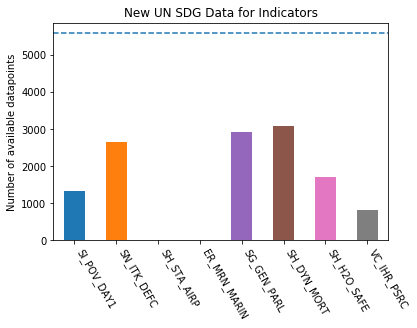

In [119]:
test_new_pre15.count()[4:].plot.bar()
plt.axhline(y=5590,linestyle='--')
plt.title('New UN SDG Data for Indicators')
plt.ylabel('Number of available datapoints')
plt.xticks(rotation=300, horizontalalignment="left")
plt.savefig('outputs/figs_factor/availability_SDG_data.png',dpi=200, bbox_inches='tight')
plt.show()

### Compare with old mydata...

In [120]:
mydata = pd.read_csv('data/oxymoron/from_RData/mydata_export.csv', low_memory=False)
mydata = mydata[[
    'Poverty',
    'Hunger',
    'Child.Mortality',
    'Education',
    'Women.Parliament',
    'Water',
    'Alternative.Energy',
    'Youth.Unemployment',
    'Internet',
    'GINI',
    'Sanitation',
    'Air.Pollution',
    'CO2.emissions',
    'Protected.Sea',
    'Protected.Land',
    'Violence']]

In [121]:
mydata.head()

,Poverty,Hunger,Child.Mortality,Education,Women.Parliament,Water,Alternative.Energy,Youth.Unemployment,Internet,GINI,Sanitation,Air.Pollution,CO2.emissions,Protected.Sea,Protected.Land,Violence
0,NaN,NaN,25.50,0.832369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133543,NaN,NaN,NaN
1,NaN,NaN,24.87,0.806355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153030,NaN,NaN,NaN
2,NaN,NaN,24.21,0.893583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166306,NaN,NaN,NaN
3,NaN,NaN,23.51,0.884190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206086,NaN,NaN,NaN
4,NaN,NaN,22.75,0.874798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238812,NaN,NaN,NaN


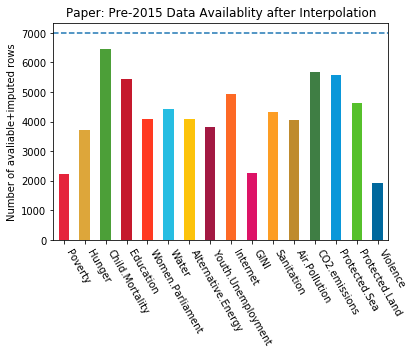

In [122]:
mydata.count().plot.bar(color=SDG_colour_list)
plt.axhline(y=7000,linestyle='--')
plt.title('Paper: Pre-2015 Data Availablity after Interpolation')
plt.ylabel('Number of avaliable+imputed rows')
plt.xticks(rotation=300, horizontalalignment="left")
plt.savefig('outputs/figs_factor/availability_oxymoron_data.png',dpi=200, bbox_inches='tight')
plt.show()

## Using WB API to get WB indicators

In [123]:
# need "pip install wbdata"
import wbdata as wb
import datetime

In [124]:
oxymoron_wb_targets = [
    'SI.POV.DDAY',
    'SN.ITK.DEFC.ZS',
    'SH.DYN.MORT',
    'SE.SEC.ENRR', # 1-x
    'SG.GEN.PARL.ZS',
    'SH.H2O.SMDW.ZS', #'SH.H2O.SAFE.ZS', # 1-x
    'EG.USE.COMM.CL.ZS', # 1-x
    'SL.UEM.1524.ZS',
    'IT.NET.USER.ZS', #'IT.NET.USER.P2', # 1-x
    'SI.POV.GINI',
    'SH.STA.SMSS.ZS', # replace since not available in API'SH.STA.ACSN', # 1-x
    'SH.STA.AIRP.P5',
    'EN.ATM.CO2E.PC',
    'ER.MRN.PTMR.ZS', # 1-x
    'ER.LND.PTLD.ZS', # 1-x
    'VC.IHR.PSRC.P5']

oxymoron_labels = [
    'Poverty',
    'Hunger',
    'Child.Mortality',
    'Education',
    'Women.Parliament',
    'Water',
    'Alternative.Energy',
    'Youth.Unemployment',
    'Internet',
    'GINI',
    'Sanitation',
    'Air.Pollution',
    'CO2.emissions',
    'Protected.Sea',
    'Protected.Land',
    'Violence']

oxy_wb_dict = {wb_target:oxy_label for wb_target,oxy_label in zip(oxymoron_wb_targets,oxymoron_labels)}

### Fetching the data takes some time on the first call:

In [125]:
# get data for the targets
wb_country_ISOa3 = list(df_WB_countries['ISOa3'])
data_date = (datetime.datetime(1990, 1, 1), datetime.datetime(2015, 1, 1))

wb_data = wb.get_dataframe(oxy_wb_dict, country=wb_country_ISOa3, data_date=data_date)
wb_data.to_csv('outputs/data/new_wb_oxymoron_pull.csv')
#wb_data = pd.read_csv('outputs/data/new_wb_oxymoron_pull.csv',index_col=['country','date'])
wb_data.head()

Poverty  Hunger  Child.Mortality  Education  Women.Parliament  \
country date                                                                  
Aruba   2015      NaN     NaN              NaN        NaN               NaN   
        2014      NaN     NaN              NaN        NaN               NaN   
        2013      NaN     NaN              NaN        NaN               NaN   
        2012      NaN     NaN              NaN  111.15980               NaN   
        2011      NaN     NaN              NaN   97.02788               NaN   

              Water  Alternative.Energy  Youth.Unemployment   Internet  GINI  \
country date                                                                   
Aruba   2015    NaN                 NaN                 NaN  88.661227   NaN   
        2014    NaN                 NaN                 NaN  83.780000   NaN   
        2013    NaN                 NaN                 NaN  78.900000   NaN   
        2012    NaN                 NaN                 NaN  74.000000   NaN   
        2011    NaN                 NaN                 NaN  69.000000   NaN   

              Sanitation Air.Pollution  CO2.emissions Protected.Sea  \
country date                                                          
Aruba   2015         NaN          None            NaN          None   
        2014         NaN          None       8.410064          None   
        2013         NaN          None       8.353561          None   
        2012         NaN          None      13.157722          None   
        2011         NaN          None      24.507516          None   

             Protected.Land  Violence  
country date                           
Aruba   2015           None       NaN  
        2014           None       1.9  
        2013           None       5.8  
        2012           None       3.9  
        2011           None       2.0

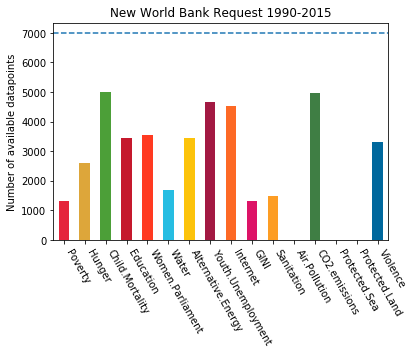

In [126]:
# check data availability
wb_data.count().plot.bar(color=SDG_colour_list)
plt.axhline(y=7000,linestyle='--')
plt.title('New World Bank Request 1990-2015')
plt.ylabel('Number of available datapoints')
plt.xticks(rotation=300, horizontalalignment="left")
plt.savefig('outputs/figs_factor/availability_wb_data_90_15.png',dpi=200, bbox_inches='tight')
plt.show()